In [1]:
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from io import StringIO # Python3 use: from io import StringIO
import sys
from utils.wrapper import *
from abc import ABC, abstractmethod
#from utils.diagnostics import *
%matplotlib notebook
np.set_printoptions(formatter={'float': lambda x: "{0:5.3f}".format(x)})

In [2]:

non_convex_optimisation.animate_moving_cluster = animate_moving_cluster
non_convex_optimisation.animate_scatterplot_distance = animate_scatterplot_distance
non_convex_optimisation.setup_scatter = setup_scatter
non_convex_optimisation.draw_ellipse = draw_ellipse

In [3]:
class objective_func(ABC):
    @abstractmethod
    def func(x):
        pass
    @abstractmethod
    def dfunc(x):
        pass
    @abstractmethod
    def get_optimal():
        pass
    @abstractmethod
    def get_optimum():
        pass
class tuned_ackley(objective_func):
    # evaluated domain: circle with radius 19
    def __init__(self, radius=19):
        self.optimal = np.array([0, 0])
        self.optimum = 0
        self.radius = radius
    def func(self, x):
        '''
        the period of local minimum along each axis is 1, integer coordinate (1,1), (2,3)... 
        x and y is interchangeable
        global minimum is 0 with arguments x=y=0
        local minimums far away from orgin are 20
        supremum is 20 + e - 1/e = 22.35
        symmetric along x=0, y=0, y=x lines
        disappearing global gradient when far away from optimal
        '''
        if np.linalg.norm(x) > self.radius:
            return 5e1
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return -20. * np.exp(arg1) - 0.1 * arg1**4 * np.exp(arg2) + 20. + np.e
    def dfunc(self, x):
        if x[0] == 0 and x[1] == 0: 
            return np.array([0, 0])
        elif np.linalg.norm(x) > self.radius:
            return np.array([0, 0])
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return np.array([-0.4 * x[0] / arg1 * np.exp(arg1) + np.pi/10 * arg1**4 * np.sin(2 * np.pi * x[0]) * np.exp(arg2) \
                         - x[0]/6250 * np.exp(arg2) * (x[0]**2 + x[1]**2), 
                         -0.4 * x[1] / arg1 * np.exp(arg1) + np.pi/10 * arg1**4 * np.sin(2 * np.pi * x[1]) * np.exp(arg2) \
                         - x[1]/6250 * np.exp(arg2) * (x[0]**2 + x[1]**2) ])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
at = tuned_ackley()
print("check func value at optimal is", at.get_optimum(), "(optimuam): ", at.func(at.get_optimal()))
print("check gradient is (0,0): ",at.dfunc(at.get_optimal()))

check func value at optimal is 0 (optimuam):  2.718281828459045
check gradient is (0,0):  [0 0]


In [14]:
mean0 = np.array([[-11.9],[18]])
sigma = np.ones((2,)) * 3
alpha = 1
beta = 2
np.random.seed(101)
optimal = np.array([0,0])
optimum = 0
tolerance = 1 * 1e-6

ex1 = non_convex_optimisation(at)
ex1.do_experiments(mean0, sigma, alpha, beta, line_search, tolerance)

*******starting soon, intitial mean: ********
 [[-11.900]
 [18.000]]
stuck in local minimum!!
eigenvalue of variance = [8.985 9.444]
min = 50.0, total iterations = 1, total evaluatios = 36
 position = -11.333914071652327 15.7233838313686



In [15]:
ex1.get_recorded_data()

(array([[50.000, 50.000, 50.000, 50.000, 50.000, 50.000],
        [50.000, 50.000, 50.000, 50.000, 50.000, 50.000]]),
 array([[[-9.193, 18.628],
         [-10.992, 18.504],
         [-11.249, 17.681],
         [-12.748, 18.606],
         [-13.918, 18.740],
         [-11.371, 17.411]],
 
        [[-11.334, 15.723],
         [-14.700, 20.865],
         [-11.328, 23.936],
         [-4.082, 20.051],
         [-10.992, 23.081],
         [-17.018, 14.523]]]),
 {'status': 'l',
  'evals_per_iter': array([[1.000, 1.000, 1.000, 1.000, 1.000, 1.000],
         [6.000, 6.000, 6.000, 6.000, 6.000, 6.000]]),
  'mean': array([[[-11.900],
          [18.000]],
  
         [[-12.291],
          [17.830]]]),
  'var': array([[[3.000, 0.000],
          [0.000, 3.000]],
  
         [[-1.917, 0.804],
          [-0.765, -2.015]]]),
  'x_adjust': array([[[-9.193, -10.992, -11.249, -12.748, -13.918, -11.371],
          [18.628, 18.504, 17.681, 18.606, 18.740, 17.411],
          [-9.193, -10.992, -11.249, -12.748

<IPython.core.display.Javascript object>


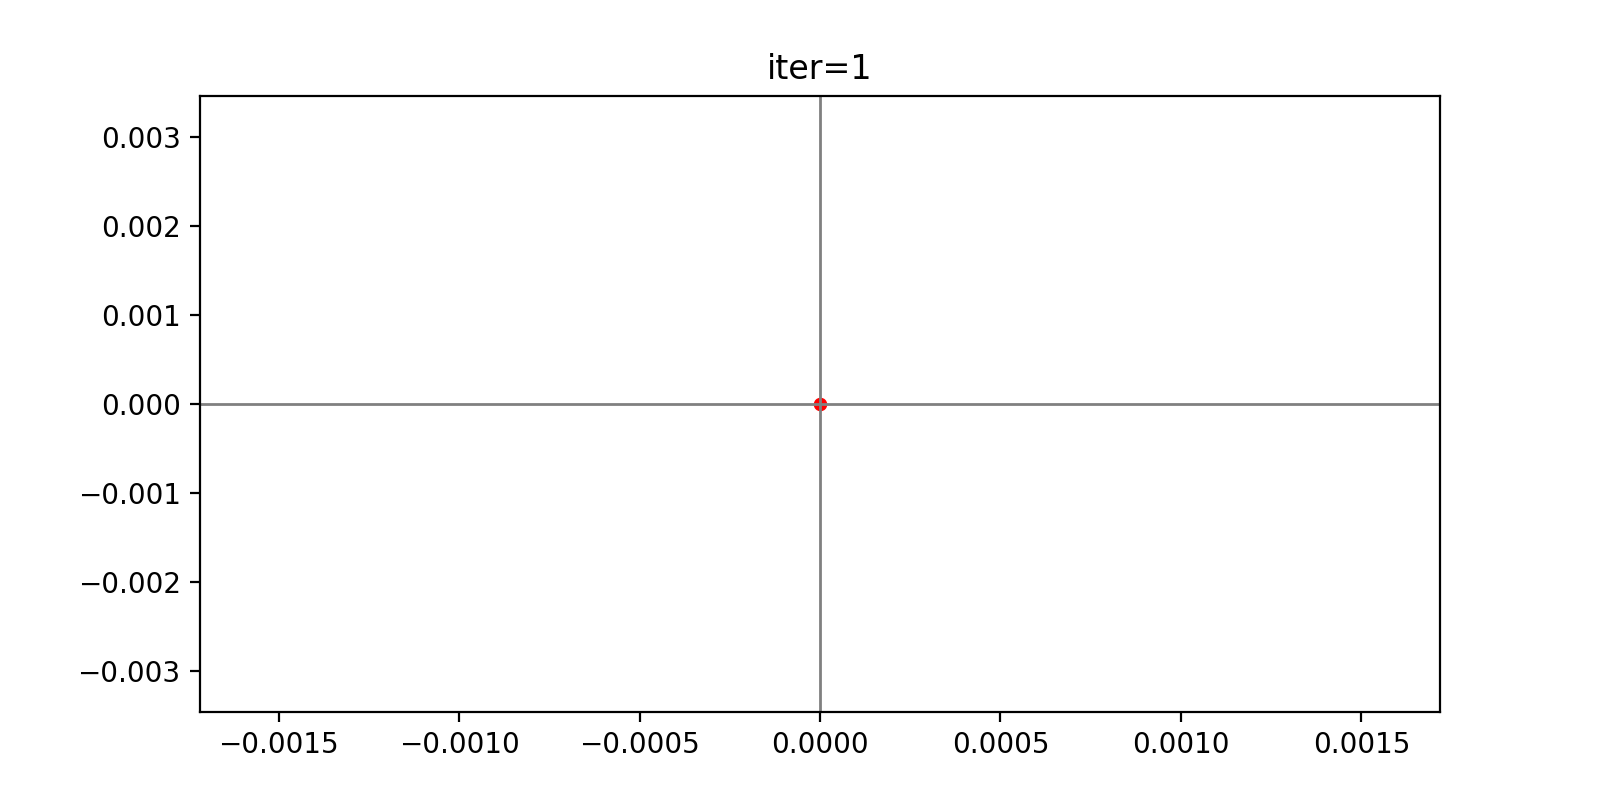

In [11]:
ex1.animate_moving_cluster()

<IPython.core.display.Javascript object>


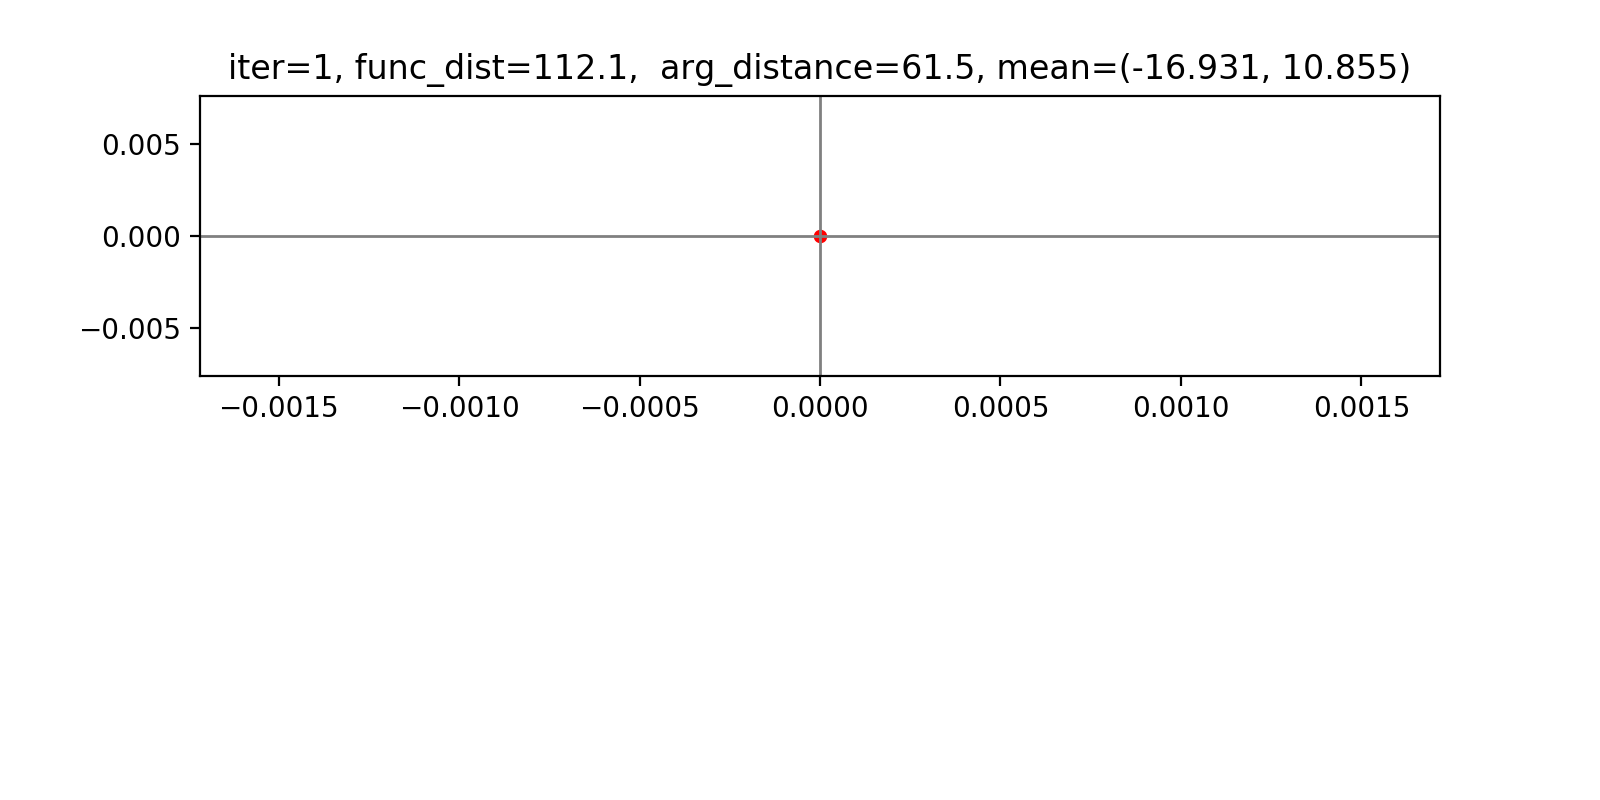

In [6]:
ex1.animate_scatterplot_distance()

<IPython.core.display.Javascript object>


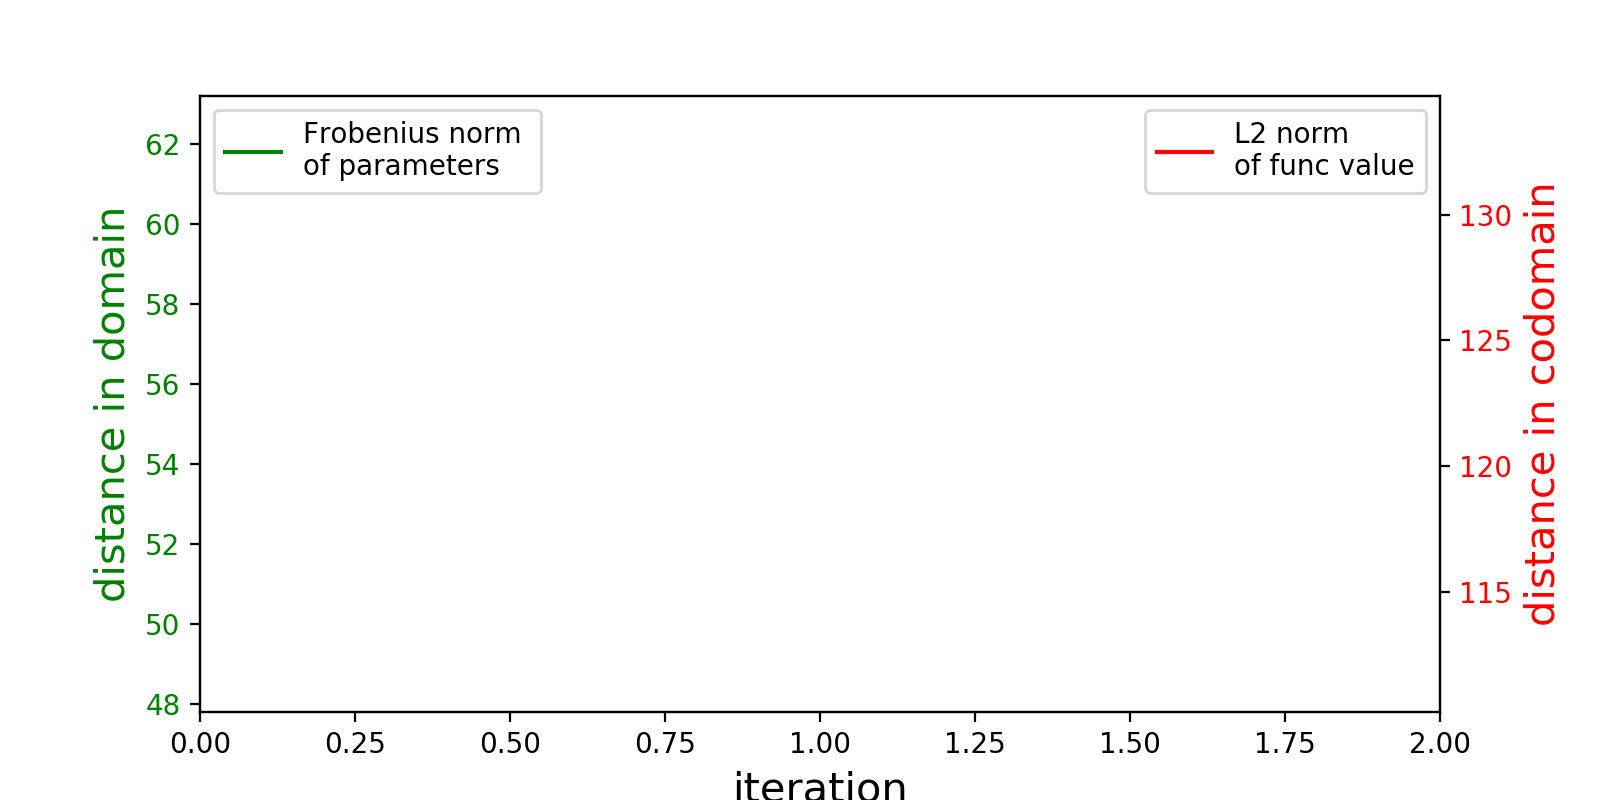

In [12]:
ex1.plot_distance()